##  Exploratory Data Analysis

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import re
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\Users\Sinagam Pradeep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Gender-Age Train Data**

In [2]:
g_a_tr=pd.read_csv('gender_age_train.csv')
g_a_tr.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [13]:
g_a_tr.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

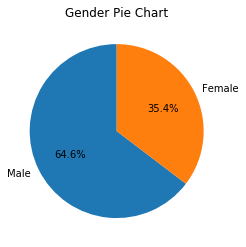

In [5]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
gender_dict=g_a_tr['gender'].value_counts()
gender_labels=['Male','Female']
male_percentage=(gender_dict['M']*100)//g_a_tr.shape[0]
female_percentage=(gender_dict['F']*100)//g_a_tr.shape[0]
sizes=[male_percentage,female_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=gender_labels, autopct='%1.1f%%',
         startangle=90)
plt.title('Gender Pie Chart')
plt.show()

### Observations 

1. The number of datpoints for Male gender age groups is more than Female gender age groups so it is an imblanaced dataset.

In [9]:
g_a_tr_male=g_a_tr[g_a_tr["gender"]=="M"]
g_a_tr_female=g_a_tr[g_a_tr["gender"]=="F"]
print(g_a_tr_male["age"].describe())
print(g_a_tr_female["age"].describe())

count    47904.000000
mean        31.052939
std          9.454653
min          1.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         90.000000
Name: age, dtype: float64
count    26741.000000
mean        32.050596
std         10.539967
min         10.000000
25%         25.000000
50%         29.000000
75%         37.000000
max         96.000000
Name: age, dtype: float64


**Observation:**

1)The Number of Male users is almost double the number of Female.

2)25,50 Percentile Age values,mean value for both Male and Female are same.

3)In General Female users have more age than Male users in the Data that can be seen from 75 percentile and max age.

**Gender Age Test Data**

In [11]:
g_a_te=pd.read_csv('gender_age_test.csv')

In [12]:
g_a_te.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [14]:
g_a_te.isnull().sum()

device_id    0
dtype: int64

In [15]:
g_a_te.shape[0]==g_a_te.nunique()

device_id    True
dtype: bool

**Phone Brand and Device Model Data**

In [16]:
p_b_d=pd.read_csv('phone_brand_device_model.csv')

In [17]:
p_b_d.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


Phone Brand and Device Model are written in chinese and need to be translated to English

In [21]:
phone_brand_english = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

In [22]:
#translation from Chinese to English
p_b_d['phone_brand'] = p_b_d['phone_brand'].apply(lambda x: phone_brand_english[x] if x in phone_brand_english else x)

In [23]:
p_b_d.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,Xiaomi,红米
1,1277779817574759137,Xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


In [25]:
#checking for duplicates
p_b_d.shape[0]==p_b_d["device_id"].nunique()

False

In [26]:
print("Number of Unique devices in p_b_d is {}".format(p_b_d["device_id"].nunique()))
print("Number of duplicates in p_b_d is {}".format(len(p_b_d)-(p_b_d["device_id"].nunique())))

Number of Unique devices in p_b_d is 186716
Number of duplicates in p_b_d is 529


So there are 529 duplicate devices in phone Data which need to be removed

In [ ]:
#removing duplicates from phone data
p_b_d=p_b_d.drop_duplicates(subset="device_id",keep='first')

In [27]:
phone_brand=dict(p_b_d['phone_brand'].value_counts())
brand_names = [k for k in sorted(phone_brand, key=phone_brand.get, reverse=True)]
#Taking Top 10 keys with highest values 
top_brand_names=brand_names[:10]
top_brand_values=[phone_brand.get(k) for k in top_brand_names]

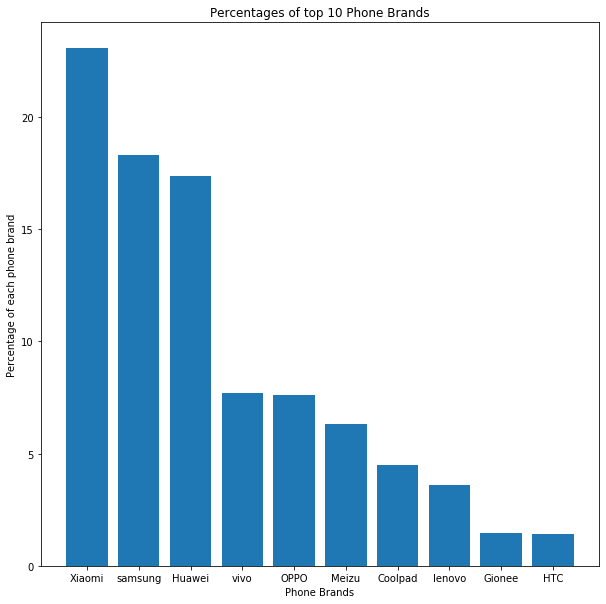

In [28]:
plt.figure(figsize=(10,10))
indices=np.arange(len(top_brand_names))
top_brand_values=np.array(top_brand_values)
percent=(top_brand_values/len(p_b_d))*100
plt.bar(indices,percent)
plt.xlabel('Phone Brands')
plt.ylabel('Percentage of each phone brand')
plt.title('Percentages of top 10 Phone Brands')
plt.xticks(indices,top_brand_names)
plt.show()

**Observation**

Xiaomi, Samsung, Huawei are the top 3 Phone Brands by Talking Data customers which have a combined user Base of almost 60% of the total users and the other 127 Phone Brands(as total unique phone brands is 130) have a combined user Base of only 40% of the total users. It is Clearly observable that Xiaomi, Samsung and Huawei dominate the other brands in china.

**Label Categories Data**

In [29]:
l_c=pd.read_csv('label_categories.csv')

In [30]:
l_c.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


**Events Data**

In [36]:
e=pd.read_csv('events.csv')

In [37]:
e.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [39]:
print("Number of Unique Devices: ",(e["device_id"].nunique()))

Number of Unique Devices:  60865


In [40]:
# Event Start and End time across the whole Data
event_times=e['timestamp'].values
print("Event Start: ",np.min(event_times))
print("Event End: ",np.max(event_times))

Event Start:  2016-04-30 23:52:24
Event End:  2016-05-08 00:00:08


**Observation:**

The Events Data provided is for a period of 8 Days Starting from 30th April 2016 mid-night to starting of 8th May 2016 12 AM

percentage of train dataset that have events is 31.22647196731194
percentage of train dataset that does not have events is 68.77352803268806


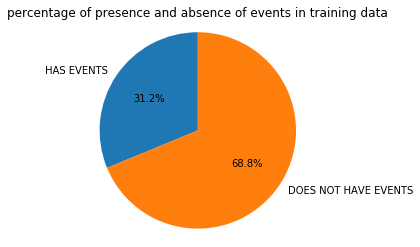

In [41]:
g_a_tr_events=pd.merge(g_a_tr,e,on="device_id",how="inner")
event_percentage=(g_a_tr_events["device_id"].nunique()/g_a_tr["device_id"].nunique())*100
print("percentage of train dataset that have events is {}".format(event_percentage))
print("percentage of train dataset that does not have events is {}".format(100-event_percentage))
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
event_labels=['HAS EVENTS','DOES NOT HAVE EVENTS']
sizes=[event_percentage,100-event_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=event_labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.title('percentage of presence and absence of events in training data')
plt.show()

percentage of test dataset that have events is 31.403306832275966
percentage of test dataset that does not have events is 68.59669316772403


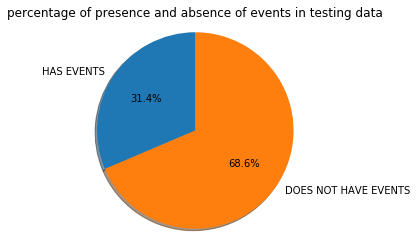

In [42]:
g_a_te_events=pd.merge(g_a_te,e,on="device_id",how="inner")
event_percentage=(g_a_te_events["device_id"].nunique()/g_a_te["device_id"].nunique())*100
print("percentage of test dataset that have events is {}".format(event_percentage))
print("percentage of test dataset that does not have events is {}".format(100-event_percentage))
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html
event_labels=['HAS EVENTS','DOES NOT HAVE EVENTS']
sizes=[event_percentage,100-event_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=event_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('percentage of presence and absence of events in testing data')
plt.show()

**Observation:**
1. Both Train and Test Data have same percentage of devices with Events ~31%
2. Both Train and Test Data have same percentage of devices without Events as well ~69%

**App Labels Data**

In [43]:
a_l=pd.read_csv('app_labels.csv')

In [44]:
a_l.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [45]:
a_l.nunique()

app_id      113211
label_id       507
dtype: int64

**Observation:**

Number of Unique app labels is 507

In [46]:
a_l_c=pd.merge(a_l,l_c,on='label_id',how='left')

In [47]:
a_l_c.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [48]:
a_l_c_names=a_l_c["category"].value_counts()

In [49]:
#top 10 most used app categories
a_l_c_names[:10]

Industry tag             56902
Custom label             53936
Tencent                  49320
game                     48707
Property Industry 2.0    45697
1 free                   19083
Services 1               11840
Property Industry new     9955
Relatives 1               9027
Irritation / Fun 1        8831
Name: category, dtype: int64

**App Events Data**

In [50]:
a_e=pd.read_csv('app_events.csv')

In [51]:
a_e.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [53]:
a_e.nunique()

event_id        1488096
app_id            19237
is_installed          1
is_active             2
dtype: int64

**Observations**

1) Number of unique apps is 19237

2) Number of unique events is 1488096

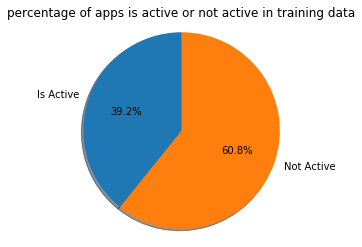

In [54]:
event_labels=['Is Active','Not Active']
is_active=len(a_e[a_e["is_active"]==1])*100/len(a_e)
sizes=[is_active,100-is_active]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=event_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('percentage of apps is active or not active in training data')
plt.show()

**OBSERVATIONS FROM EDA**:

1)Only approx 31% of dataset has event details in both training and test datset.

2)We need to use Phone Brand and Phone Model Data as features to make a model for Devices without Events to predict testdata points with only these features.

3)We can use event related features along with Phone brand and model features for Devices which contain event information.

4)Since the training datset contains 12 different groups we can encode them from 0-11 instead of m23 or f30 and so on for our easy convinence.

##  Data Processing

In [64]:
encoder=LabelEncoder()
class_encode=encoder.fit_transform(g_a_tr['group'])
#how classess are encoded i.e which number correponds to which class
classes= list(encoder.classes_)
classes_Encoded = list(encoder.transform(encoder.classes_))
print("classes encoded in to {}".format(dict(list(zip(classes,classes_Encoded)))))

classes encoded in to {'F23-': 0, 'F24-26': 1, 'F27-28': 2, 'F29-32': 3, 'F33-42': 4, 'F43+': 5, 'M22-': 6, 'M23-26': 7, 'M27-28': 8, 'M29-31': 9, 'M32-38': 10, 'M39+': 11}


In [65]:
g_a_tr["class"]=class_encode

In [66]:
g_a_tr.drop(['age','gender','group'],axis=1,inplace=True)

In [68]:
ques_events=np.in1d(g_a_tr["device_id"].values,e["device_id"].values)
#creating a events column in both train datset
g_a_tr["events"]=ques_events
g_a_tr["events"].value_counts()

False    51336
True     23309
Name: events, dtype: int64

In [69]:
ques_events=np.in1d(g_a_te["device_id"].values,e["device_id"].values)
#creating a events column in both test datset
g_a_te["events"]=ques_events
g_a_te["events"].value_counts()

False    76877
True     35194
Name: events, dtype: int64

In [70]:
g_a_tr.head()

,device_id,class,events
0,-8076087639492063270,10,False
1,-2897161552818060146,10,False
2,-8260683887967679142,10,True
3,-4938849341048082022,9,False
4,245133531816851882,9,False


In [72]:
g_a_te.head()

,device_id,events
0,1002079943728939269,True
1,-1547860181818787117,True
2,7374582448058474277,True
3,-6220210354783429585,True
4,-5893464122623104785,False


##  Data Preparation

As the dataset contains both datapoints with and without events we divide them in to 2 datasets accordingly.

In [81]:
train_events=g_a_tr[g_a_tr["events"]==True]
train_no_events=g_a_tr[g_a_tr["events"]==False]

In [84]:
test_events=g_a_te[g_a_te["events"]==True]
test_no_events=g_a_te[g_a_te["events"]==False]

In [85]:
train_events.drop(['events'],axis=1,inplace=True)
test_events.drop(['events'],axis=1,inplace=True)

In [86]:
train_no_events.drop(['events'],axis=1,inplace=True)
test_no_events.drop(['events'],axis=1,inplace=True)

In [100]:
#setting device_id as index
train_events=train_events.set_index('device_id')
train_no_events=train_no_events.set_index('device_id')
test_events=test_events.set_index('device_id')
test_no_events=test_no_events.set_index('device_id')
g_a_te=g_a_te.set_index("device_id")
g_a_tr=g_a_tr.set_index("device_id")
e=e.set_index('event_id')
p_b_d=p_b_d.set_index("device_id")

In [105]:
a_e["is_active"]=(a_e["is_active"]).astype(bool)

In [117]:
#dropping is_installed siince it contains only single unique values in the column so, it's of no use
a_e=a_e.drop(["is_installed"],axis=1)

We will create coloumns trainrow, testrow in Train and Test Data to indicate which row a particular device belongs to and this will be useful in our One-hot encoded Sparse Matrix Creation, in which we will specify row number in the sparse matrix

In [120]:
g_a_tr['trainrow']=np.arange(g_a_tr.shape[0])
train_events['trainrow']=np.arange(train_events.shape[0])
g_a_te['testrow']=np.arange(g_a_te.shape[0])
test_events['testrow']=np.arange(test_events.shape[0])
train_no_events['trainrow']=np.arange(train_no_events.shape[0])
test_no_events['testrow']=np.arange(test_no_events.shape[0])

Here we have 2 ways in which Phone Model is used:
1. Concatinating Phone Brand + Model to create Unique combinations which will be used for Data Containing Events
2. Use the Phone Model as it is without concatinating with Phone Brand for Devices with No Events Data

In [121]:
concat_model = p_b_d['phone_brand'].str.cat(p_b_d['device_model'])
encoder=LabelEncoder().fit(concat_model)
p_b_d['model_brand']=encoder.transform(concat_model)
n_events_models=len(encoder.classes_)
model_encode=LabelEncoder().fit(p_b_d['device_model'])
p_b_d['device_model']=model_encode.transform(p_b_d['device_model'])
n_models=len(model_encode.classes_)
model_encode=LabelEncoder().fit(p_b_d['phone_brand'])
p_b_d['phone_brand']=model_encode.transform(p_b_d['phone_brand'])
n_brands=len(model_encode.classes_)

In [125]:
train_events["phone_brand"]=p_b_d["phone_brand"]
test_events["phone_brand"]=p_b_d["phone_brand"]
test_events["device_model"]=p_b_d["model_brand"]
train_events["device_model"]=p_b_d["model_brand"]

train_no_events["phone_brand"]=p_b_d["phone_brand"]
test_no_events["phone_brand"]=p_b_d["phone_brand"]
train_no_events["device_model"]=p_b_d["device_model"]
test_no_events["device_model"]=p_b_d["device_model"]

g_a_tr["phone_brand"]=p_b_d["phone_brand"]
g_a_te["phone_brand"]=p_b_d["phone_brand"]
g_a_tr["device_model"]=p_b_d["device_model"]
g_a_te["device_model"]=p_b_d["device_model"]

### Bag Of Apps

Approach Refererd from: https://www.kaggle.com/dvasyukova/a-linear-model-on-apps-and-labels

For Each device we want to know which all apps were installed in the device. So we will first encode All the App Ids as integers from 0 to number of unique apps - 1. To get the Apps which are installed in a device denoted by device_id, we merge device_id column from events table to app_events group the resulting dataframe by device_id and app and aggregate. we then Merge in the trainrow, testrow  columns to know at which row to put each device in the features matrix

In [126]:
app_encoder = LabelEncoder().fit(a_e['app_id'])
a_e['app'] = app_encoder.transform(a_e['app_id'])
n_apps = len(app_encoder.classes_)# number of unique apps it will be used in creating One-Hot Encoding of Apps 
apps_on_devices = (a_e.merge(e[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(train_events[['trainrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id
                       .merge(test_events[['testrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id
                       .reset_index())

###  Bag of Labels

App Labels are also created in a similar approach by merging with apps_on_devices dataframe and grouping by labels and then merging it with trainrow, testrow to know at which row to put each device in the feature matrix

In [130]:
a_l = a_l.loc[a_l['app_id'].isin(a_e['app_id'].unique())]
a_l['app'] = app_encoder.transform(a_l['app_id'])
labelencoder = LabelEncoder().fit(a_l['label_id'])
a_l['label'] = labelencoder.transform(a_l['label_id'])
n_labels = len(labelencoder.classes_)

In [131]:
labels_on_devices = (apps_on_devices[['device_id','app']]
                .merge(a_l[['app','label']])
                .groupby(['device_id','label'])['app'].agg(['size'])
                .merge(train_events[['trainrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id
                .merge(test_events[['testrow']], how='left', left_index=True, right_index=True)#merges by index which is device_id
                .reset_index())


### Event Day and Time Features

In [133]:
#Extracting Hours from Events Time Stamp
e['hour'] = e['timestamp'].map(lambda x:pd.to_datetime(x).hour)
e['hourbin'] = [1 if ((x>=1)&(x<=6)) else 2 if ((x>=7)&(x<=12)) else 3 if ((x>=13)&(x<=18)) else 4 for x in e['hour']]

Grouping hours by device_id, and concatinating all the hours which occur for a particular device_id and forming a string of all the hours for that device.Appending a '0' string before integers as TFidf or Count Vectorizer strangely don't count single digit numbers as strings

In [134]:
hour_events = e.groupby("device_id")["hour"].apply(lambda x: " ".join('0'+str(s) for s in x))
hour_events.head()

device_id
-9222956879900151005    011 012 015 012 015 021 015 015 021 07 012 015...
-9222661944218806987                       021 019 022 018 018 018 00 018
-9222399302879214035              011 013 023 021 013 023 010 013 023 013
-9221825537663503111    07 07 07 08 013 07 06 07 07 08 013 08 013 010 ...
-9221767098072603291                         05 015 014 012 018 05 013 07
Name: hour, dtype: object

In [135]:
hourbin_events = e.groupby("device_id")["hourbin"].apply(lambda x: " ".join('0'+str(s) for s in x))
hourbin_events.head()

device_id
-9222956879900151005    02 02 03 02 03 04 03 03 04 02 02 03 03 02 02 0...
-9222661944218806987                              04 04 04 03 03 03 04 03
-9222399302879214035                        02 03 04 04 03 04 02 03 04 03
-9221825537663503111    02 02 02 02 03 02 01 02 02 02 03 02 03 02 02 0...
-9221767098072603291                              01 03 03 02 03 01 03 02
Name: hourbin, dtype: object

In [137]:
#creating the columns hours,hour bins in train,test using the above created two variables which are created using group by device_id.
train_events['event_hours']=train_events.index.map(hour_events)
test_events['event_hours']=test_events.index.map(hour_events)
train_events['event_hours_bins']=train_events.index.map(hourbin_events)
test_events['event_hours_bins']=test_events.index.map(hourbin_events)

In [142]:
#finding the day of week from timestamp and labelling it
e["timestamp"]=pd.to_datetime(e["timestamp"])
days_of_week=e['timestamp'].dt.day_name()
e['day']=days_of_week.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [143]:
day_events = e.groupby("device_id")["day"].apply(lambda x: " ".join('0'+str(s) for s in x))
day_events.head()

device_id
-9222956879900151005    06 06 06 06 05 05 05 05 05 06 06 05 05 06 06 0...
-9222661944218806987                              03 04 01 00 06 05 00 02
-9222399302879214035                        03 01 02 05 03 03 03 03 02 01
-9221825537663503111    06 06 05 00 04 05 05 05 04 00 04 00 01 01 00 0...
-9221767098072603291                              03 00 00 03 04 02 01 03
Name: day, dtype: object

In [144]:
train_events['event_day']=train_events.index.map(day_events)
test_events['event_day']=test_events.index.map(day_events)

### Events Latitude and Longitudes

In [145]:
#taking the medain of latitude and longitude and mapping it to train,test dataset.
latitude_events = e.groupby("device_id")["latitude"].apply(lambda x: np.median([float(s) for s in x]))
longitude_events = e.groupby("device_id")["longitude"].apply(lambda x: np.median([float(s) for s in x]))

In [148]:
train_events['event_median_latitude']=train_events.index.map(latitude_events)
train_events['event_median_longitude']=train_events.index.map(longitude_events)
test_events['event_median_latitude']=test_events.index.map(latitude_events)
test_events['event_median_longitude']=test_events.index.map(longitude_events)

###  Apps is_active

First we group the is_active by event_id and create a string of is_active values, we then map these values to event_id in events table. Then we group these is_active labels by device_id and concatinate the values to from a string of is_active features

In [149]:
#app_active is grouped using event_id 
app_active = a_e.groupby("event_id")["is_active"].apply(lambda x: " ".join(str(s) for s in x))

In [150]:
app_active.head()

event_id
2     True False False True True True False False Fa...
6     True True True True True False True False True...
7     False True False False True True False False F...
9     False False False False False False False True...
16    False False False False False False False True...
Name: is_active, dtype: object

In [151]:
#creates a column in events using the output of above cell
e["apps_active"] = e.index.map(app_active)
#mapping the app_active to group by device_id
device_map_app_active = e.groupby("device_id")["apps_active"].apply(lambda x: " ".join(str(s) for s in x if str(s)!='nan'))

In [153]:
train_events["app_active"]=train_events.index.map(device_map_app_active)
test_events["app_active"]=test_events.index.map(device_map_app_active)

In [155]:
train_events.head(1)

,class,trainrow,phone_brand,device_model,event_hours,event_hours_bins,event_day,event_median_latitude,event_median_longitude,app_active
device_id,,,,,,,,,,
-8260683887967679142,10,0,51,843,014,03,00,0.0,0.0,False False False False True False True False ...


In [156]:
train_data_store=train_events.reset_index()

In [159]:
test_data_store=test_events.reset_index()

In [160]:
train_data_noevents=train_no_events.reset_index()

In [161]:
test_data_noevents=test_no_events.reset_index()

In [162]:
#Storing the Processed Events Train Data
train_data_store.to_csv('Processed_events_train_data.csv')

In [163]:
#Storing the Processed Events Test
test_data_store.to_csv('Processed_events_test_data.csv')

In [164]:
#Storing the Processed No Events Train Data
train_data_noevents.to_csv('Processed_no_events_train_data.csv')

In [165]:
#Storing the Processed No Events Test
test_data_noevents.to_csv('Processed_no_events_test_data.csv')

In [504]:
#https://stackoverflow.com/questions/8955448/save-load-scipy-sparse-csr-matrix-in-portable-data-format
def save_sparse(filename, xmtr):

    np.savez(filename,data = xmtr.data ,indices= xmtr.indices,
             indptr =xmtr.indptr, shape=xmtr.shape )

In [505]:
#https://stackoverflow.com/questions/8955448/save-load-scipy-sparse-csr-matrix-in-portable-data-format
def load_sparse(filename):
    tmp = np.load(filename)
    return csr_matrix((tmp['data'], tmp['indices'], tmp['indptr']), shape= tmp['shape'])

##  Feature Engineering

We Use 2 Different Sets of Features for Data with Events and Data without Events
1. **Data Without Events:** One-hot Encodings of Phone Brand, Phone Model, has Event
2. **Data with Events:** One-hots of Apps, Labels, Phone Brand, Phone Model, Event Day, Event Hour, Standardized  Latitude and Longitude values

### All Devices Data

One-Hot Encoding using CSR Matrix Approach Refered from: https://www.kaggle.com/dvasyukova/a-linear-model-on-apps-and-labels

We will Construct One-Hot Encoding for Phone Brand, Phone Model, Apps, App Labels using the Below CSR Matrix Constructor:

csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])

where ``data``, ``row_ind`` and ``col_ind`` satisfy the
relationship ``a[row_ind[k], col_ind[k]] = data[k]``

**Phone Brand One-Hot**

In [242]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_brand = csr_matrix((np.ones(g_a_tr.shape[0]), # Number of Rows/Devices
                       (g_a_tr.trainrow, g_a_tr.phone_brand)))
Xte_brand = csr_matrix((np.ones(g_a_te.shape[0]), # Number of Rows/Devices
                       (g_a_te.testrow, g_a_te.phone_brand)))
print(Xtr_brand.shape)
print(Xte_brand.shape)

(74645, 131)
(112071, 131)


**Phone Model One-Hot**

In [243]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
Xtr_model = csr_matrix((np.ones(g_a_tr.shape[0]), # Number of Rows/Devices
                       (g_a_tr.trainrow, g_a_tr.device_model)))
Xte_model = csr_matrix((np.ones(g_a_te.shape[0]), # Number of Rows/Devices
                       (g_a_te.testrow, g_a_te.device_model)))
print(Xtr_model.shape)
print(Xte_model.shape)

(74645, 1599)
(112071, 1599)


In [246]:
X_tr_o_h=hstack((Xtr_brand,Xtr_model),format='csr')
X_te_o_h=hstack((Xte_brand,Xte_model),format='csr')

print(X_tr_o_h.shape)
print(X_te_o_h.shape)

(74645, 1730)
(112071, 1730)


###   Devices With No Events

**Phone Brand One-Hot**

In [241]:
X_tr_no_event_brand = csr_matrix((np.ones(train_no_events.shape[0]), # Number of Rows/Devices
                       (train_no_events.trainrow, train_no_events.phone_brand)), 
                              shape=(train_no_events.shape[0],n_brands))
X_te_no_event_brand = csr_matrix((np.ones(test_no_events.shape[0]), # Number of Rows/Devices
                       (test_no_events.testrow, test_no_events.phone_brand)),
                             shape=(test_no_events.shape[0],n_brands))
print(X_tr_no_event_brand.shape)
print(X_te_no_event_brand.shape)

(51336, 131)
(76877, 131)


**Phone Model One-Hot**

In [244]:
X_tr_no_event_model = csr_matrix((np.ones(train_no_events.shape[0]), # Number of Rows/Devices
                       (train_no_events.trainrow, train_no_events.device_model)), 
                              shape=(train_no_events.shape[0],n_models))
X_te_no_event_model= csr_matrix((np.ones(test_no_events.shape[0]), # Number of Rows/Devices
                       (test_no_events.testrow, test_no_events.device_model)),
                             shape=(test_no_events.shape[0],n_models))
print(X_tr_no_event_model.shape)
print(X_te_no_event_model.shape)

(51336, 1599)
(76877, 1599)


In [245]:
X_tr_no_events_o_h=hstack((X_tr_no_event_brand,X_tr_no_event_model),format='csr')
X_te_no_events_o_h=hstack((X_te_no_event_brand,X_te_no_event_model),format='csr')

print(X_tr_no_events_o_h.shape)
print(X_te_no_events_o_h.shape)

(51336, 1730)
(76877, 1730)


In [86]:
#Saving One-hot encoded Matrices
save_sparse('Train_Noevents_One_hot_brand_model_matrix',X_train_noevents_one_hot)
save_sparse('Test_Noevents_One_hot_brand_model_matrix',X_test_noevents_one_hot)

###   Devices With Events

**Phone Brand One-Hot**

In [166]:
X_tr_event_brand = csr_matrix((np.ones(train_events.shape[0]), # Number of Rows/Devices
                       (train_events.trainrow, train_events.phone_brand)), 
                              shape=(train_events.shape[0],n_brands))
X_te_event_brand = csr_matrix((np.ones(test_events.shape[0]), # Number of Rows/Devices
                       (test_events.testrow, test_events.phone_brand)),
                             shape=(test_events.shape[0],n_brands))
print("Train Brand One-hot Shape: ",X_tr_event_brand.shape)
print("Test Brand One-hot Shape: ",X_te_event_brand.shape)

Train Brand One-hot Shape:  (23309, 131)
Test Brand One-hot Shape:  (35194, 131)


**Phone Model One-Hot**

In [167]:
X_tr_event_model = csr_matrix((np.ones(train_events.shape[0]), # Number of Rows/Devices
                       (train_events.trainrow, train_events.device_model)), 
                              shape=(train_events.shape[0],n_events_models))
X_te_event_model = csr_matrix((np.ones(test_events.shape[0]), # Number of Rows/Devices
                       (test_events.testrow, test_events.device_model)),
                             shape=(test_events.shape[0],n_events_models))
print("Train Brand One-hot Shape: ",X_tr_event_model.shape)
print("Test Brand One-hot Shape: ",X_te_event_model.shape)

Train Brand One-hot Shape:  (23309, 1667)
Test Brand One-hot Shape:  (35194, 1667)


**Event Apps One-Hot Encoding**

In [168]:
d = apps_on_devices.dropna(subset=['trainrow'])
X_tr_event_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)), 
                      shape=(train_events.shape[0],n_apps))
#Since the Deviceapps has both train and test columns merged to create Test Apps One-Hot we will Drop all Nan of Test Row
#Once we remove Nan in Test Rows we will get the Apps in Test Data and we create CSR Matrix for those rows
d = apps_on_devices.dropna(subset=['testrow'])
X_te_event_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)), 
                      shape=(test_events.shape[0],n_apps))
print("Train Event Apps One-hot Shape: ",X_tr_event_app.shape)
print("Test Event Apps One-hot Shape: ",X_te_event_app.shape)

Train Event Apps One-hot Shape:  (23309, 19237)
Test Event Apps One-hot Shape:  (35194, 19237)


**Event Labels One-Hot Encoding**

In [170]:
d = labels_on_devices.dropna(subset=['trainrow'])
X_tr_event_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)), 
                      shape=(train_events.shape[0],n_labels))
#Since the Devicelabels has both train and test columns merged to create Test Labels One-Hot we will Drop all Nan of Test Row
#Once we remove Nan in Test Rows we will get the Labels in Test Data and we create CSR Matrix for those rows
d = labels_on_devices.dropna(subset=['testrow'])
X_te_event_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)), 
                      shape=(test_events.shape[0],n_labels))
print("Train Event Labels One-hot Shape: ",X_tr_event_label.shape)
print("Test Event Labels One-hot Shape: ",X_te_event_label.shape)

Train Event Labels One-hot Shape:  (23309, 492)
Test Event Labels One-hot Shape:  (35194, 492)


**Event Hours TFIDF Vector Encodings**

In [171]:
encode=TfidfVectorizer().fit(train_events["event_hours"].values)
X_tr_event_hours=encode.transform(train_events["event_hours"].values)
X_te_event_hours=encode.transform(test_events["event_hours"].values)
print(X_tr_event_hours.shape)
print(X_te_event_hours.shape)

(23309, 24)
(35194, 24)


**Event Hour Bins One-Hot Encodings**

In [172]:
vectorizer_5=CountVectorizer(binary=True)
vectorizer_5.fit(train_events['event_hours_bins'].values)

X_tr_event_hours_bins = vectorizer_5.transform(train_events['event_hours_bins'].values)
X_te_event_hours_bins= vectorizer_5.transform(test_events['event_hours_bins'].values)

print(X_tr_event_hours_bins.shape)
print(X_te_event_hours_bins.shape)

(23309, 4)
(35194, 4)


**Event Day TFIDF Encodings**

In [173]:
encode=TfidfVectorizer().fit(train_events["event_day"].values)
X_tr_event_day=encode.transform(train_events["event_day"].values)
X_te_event_day=encode.transform(test_events["event_day"].values)
print(X_tr_event_day.shape)
print(X_te_event_day.shape)

(23309, 7)
(35194, 7)


**Standardizing Latitude**

In [174]:
encode=StandardScaler().fit(train_events['event_median_latitude'].values.reshape(-1,1))
X_tr_event_latitude=encode.transform(train_events['event_median_latitude'].values.reshape(-1,1))
X_te_event_latitude=encode.transform(test_events['event_median_latitude'].values.reshape(-1,1))
print(X_tr_event_latitude.shape)
print(X_te_event_latitude.shape)

(23309, 1)
(35194, 1)


**Standardizing Longitude**

In [175]:
encode=StandardScaler().fit(train_events['event_median_longitude'].values.reshape(-1,1))
X_tr_event_longitude=encode.transform(train_events['event_median_longitude'].values.reshape(-1,1))
X_te_event_longitude=encode.transform(test_events['event_median_longitude'].values.reshape(-1,1))
print(X_tr_event_longitude.shape)
print(X_te_event_longitude.shape)

(23309, 1)
(35194, 1)


**Apps is_active TFIDF Vector Encodings**

In [176]:
encode=TfidfVectorizer().fit(train_events["app_active"].values)
X_tr_event_app_active=encode.transform(train_events["app_active"].values)
X_te_event_app_active=encode.transform(test_events["app_active"].values)
print(X_tr_event_app_active.shape)
print(X_te_event_app_active.shape)

(23309, 2)
(35194, 2)


In [179]:
X_tr_event_hours=X_tr_event_hours.tocsr()
X_te_event_hours=X_te_event_hours.tocsr()
X_tr_event_hours_bins=X_tr_event_hours_bins.tocsr()
X_te_event_hours_bins=X_te_event_hours_bins.tocsr()
X_tr_event_day=X_tr_event_day.tocsr()
X_te_event_day=X_te_event_day.tocsr()
X_tr_event_app_active=X_tr_event_app_active.tocsr()
X_te_event_app_active=X_te_event_app_active.tocsr()

In [180]:
X_tr_event_o_h=hstack((X_tr_event_app,X_tr_event_model,X_tr_event_brand,X_tr_event_label,X_tr_event_hours,X_tr_event_hours_bins,X_tr_event_longitude,X_tr_event_latitude,X_tr_event_app_active,X_tr_event_day),format='csr')
X_te_event_o_h=hstack((X_te_event_app,X_te_event_model,X_te_event_brand,X_te_event_label,X_te_event_hours,X_te_event_hours_bins,X_te_event_longitude,X_te_event_latitude,X_te_event_app_active,X_te_event_day),format='csr')
print(X_tr_event_o_h.shape)
print(X_te_event_o_h.shape)

(23309, 21566)
(35194, 21566)


In [183]:
#Saving One-hot encoded Matrices
save_sparse('Train_Events_matrix',X_tr_event_o_h)
save_sparse('Test_Events_matrix',X_te_event_o_h)

# Models

###  Devices without Events

### CatBoostClassifier

In [456]:
train_data=g_a_tr.drop(["class","trainrow"],axis=1)

In [271]:
!pip install catboost

In [459]:
train_1, cv_1, y_train_1, y_cv_1 = train_test_split(train_data, y_data,stratify=y_data,test_size=0.15,random_state=18)

In [464]:
from catboost import CatBoostClassifier,Pool
categorical_features_indices = [0,1,2]
train_dataset = Pool(data=train_1,
                     label=y_train_1,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=cv_1,
                    label=y_cv_1,
                    cat_features=categorical_features_indices)

# Initialize CatBoostClassifier
model_cat_1 = CatBoostClassifier(n_estimators=1500,
                           loss_function='MultiClass')

# Fit model
model_cat_1.fit(train_dataset,verbose=False)
pred_proba_1 = model.predict_proba(eval_dataset)

model_cat_2 = CatBoostClassifier(n_estimators=2500,
                           loss_function='MultiClass')

model_cat_2.fit(train_dataset,verbose=False)
pred_proba_2 = model.predict_proba(eval_dataset)

model_cat_3 = CatBoostClassifier(n_estimators=3500,
                           loss_function='MultiClass')

model_cat_3.fit(train_dataset,verbose=False)
pred_proba_3 = model.predict_proba(eval_dataset)

model_cat_4 = CatBoostClassifier(n_estimators=4500,
                           loss_function='MultiClass')

model_cat_4.fit(train_dataset,verbose=False)
pred_proba_4 = model.predict_proba(eval_dataset)


In [470]:
test=test_no_events.drop(["testrow"],axis=1)

In [472]:
events=[]
for i in range(len(test)):
    events.append("False")
test["events"]=events

In [476]:
test_dataset = Pool(data=test,
                    
                    cat_features=categorical_features_indices)

### Test Predictions

In [477]:
test_pred_1=model_cat_1.predict_proba(test_dataset)
test_pred_2=model_cat_2.predict_proba(test_dataset)
test_pred_3=model_cat_3.predict_proba(test_dataset)
test_pred_4=model_cat_4.predict_proba(test_dataset)

In [481]:
for i in range(test_pred_1.shape[0]):
    for j in range(test_pred_1.shape[1]):
        test_pred[i][j]=(test_pred_1[i][j]+test_pred_2[i][j]+test_pred_3[i][j]+test_pred_4[i][j])/4

**Saving Test Prediction**

In [482]:
savez_compressed("test_pred_catboost.npz",test_pred)

In [184]:
!pip install keras

In [185]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Input,PReLU
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import Adagrad

Using TensorFlow backend.


In [289]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [290]:
import datetime

In [333]:
from keras.callbacks import EarlyStopping,TensorBoard
early_stop_1=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

###  Neural Network 

In [ ]:
y_data=g_a_tr['class'].values
train_1, cv_1, y_train_1, y_cv_1 = train_test_split(X_tr_o_h, y_data,stratify=y_data,test_size=0.15,random_state=18)
test_1=X_te_no_events_o_h

Network Architecture Refered from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424

In [365]:
def model_no_events(input_shape):
    model = Sequential()
    model.add(Dense(256, input_dim=input_shape))
    model.add(PReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(PReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(12))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [366]:
model=model_no_events(X_tr_o_h.shape[1])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               443136    
_________________________________________________________________
p_re_lu_17 (PReLU)           (None, 256)               256       
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                16448     
_________________________________________________________________
p_re_lu_18 (PReLU)           (None, 64)                64        
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)               

In [367]:
import datetime

In [368]:
def get_network_no_events_models(seeds):

    model_list_no_events=[]
    avg_cv_loss=0
    for i in range(len(seeds)):
        train, cv, y_train, y_cv = train_test_split(X_tr_o_h, y_data,stratify=y_data,test_size=0.15,random_state=seeds[i])
        y_train_nn=np_utils.to_categorical(y_train)
        y_cv_nn=np_utils.to_categorical(y_cv)
        model=model_no_events(train.shape[1])
        logdir = "no_events"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        t=TensorBoard(log_dir=logdir)
        model.fit(train, y_train_nn, batch_size=350, epochs=30, verbose=2, validation_data=(cv, y_cv_nn),callbacks=[early_stop_1,t])
        model_cv_prediction=model.predict_proba(cv)
        cv_loss=log_loss(y_cv, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_no_events.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=len(seeds)
    print("Average CV Loss of "+str(len(seeds))+" Runs :",avg_cv_loss)
    return model_list_no_events

In [369]:
random_seeds=[1,2,3,4,5]

In [370]:
model_list_no_events=get_network_no_events_models(random_seeds)

Train on 63448 samples, validate on 11197 samples
Epoch 1/30
 - 9s - loss: 3.0035 - accuracy: 0.1015 - val_loss: 2.4398 - val_accuracy: 0.1149
Epoch 2/30
 - 8s - loss: 2.5282 - accuracy: 0.1256 - val_loss: 2.4177 - val_accuracy: 0.1349
Epoch 3/30
 - 8s - loss: 2.4333 - accuracy: 0.1412 - val_loss: 2.4031 - val_accuracy: 0.1478
Epoch 4/30
 - 7s - loss: 2.4067 - accuracy: 0.1493 - val_loss: 2.3958 - val_accuracy: 0.1503
Epoch 5/30
 - 8s - loss: 2.3927 - accuracy: 0.1557 - val_loss: 2.3932 - val_accuracy: 0.1503
Epoch 6/30
 - 7s - loss: 2.3850 - accuracy: 0.1609 - val_loss: 2.3935 - val_accuracy: 0.1529
Epoch 7/30
 - 8s - loss: 2.3790 - accuracy: 0.1608 - val_loss: 2.3937 - val_accuracy: 0.1541
Epoch 8/30
 - 8s - loss: 2.3731 - accuracy: 0.1642 - val_loss: 2.3938 - val_accuracy: 0.1541
Epoch 9/30
 - 8s - loss: 2.3679 - accuracy: 0.1667 - val_loss: 2.3958 - val_accuracy: 0.1484
Epoch 10/30
 - 7s - loss: 2.3650 - accuracy: 0.1685 - val_loss: 2.3976 - val_accuracy: 0.1492
CV Log Loss of Best

**Average Test Predictions**

In [373]:
test_pred_avg_nn=np.zeros((test_1.shape[0],12))

for i in range(len(model_list_no_events)):
    test_pred=model_list_no_events[i].predict_proba(test_1)
    test_pred_avg_nn+=test_pred
test_pred_avg_nn/=len(model_list_no_events)


**Saving Test Prediction**

In [379]:
savez_compressed('y_test_pred_nn.npz',test_pred_avg_nn)

### Devices with Events

**Train, CV Split**

In [188]:
y_data_events=train_events['class'].values

In [189]:
train_2, cv_2, y_train_2, y_cv_2 = train_test_split(X_tr_event_o_h,y_data_events,stratify=y_data_events,test_size=0.2,random_state=9)
test_2=X_te_event_o_h

In [190]:
y_train_nn_3=np_utils.to_categorical(y_train_2)
y_cv_nn_3=np_utils.to_categorical(y_cv_2)

### Neural Network 1

Network Architecture Refered from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424

The Dropout in the input Layer adds value and variability for predictions and is helpful for taking avaerage of predictions

In [200]:
def model_nn(input_dim,output_dim):
    model = Sequential()
    model.add(Dropout(0.15, input_shape=(input_dim,)))
    model.add(Dense(240, init='uniform'))
    model.add(PReLU(init='zero'))
    model.add(Dropout(0.8))
    model.add(Dense(240, init='uniform'))
    model.add(PReLU(init='zero', weights=None))
    model.add(Dropout(0.35))
    model.add(Dense(260, init='uniform'))
    model.add(PReLU(init='zero', weights=None))
    model.add(Dropout(0.40))
    model.add(Dense(output_dim, init='uniform'))
    model.add(Activation('softmax'))

    opt = Adagrad(lr=0.008, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [201]:
model=model_nn(X_tr_event_o_h.shape[1],12)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_18 (Dropout)         (None, 21566)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 240)               5176080   
_________________________________________________________________
p_re_lu_13 (PReLU)           (None, 240)               240       
_________________________________________________________________
dropout_19 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 240)               57840     
_________________________________________________________________
p_re_lu_14 (PReLU)           (None, 240)               240       
_________________________________________________________________
dropout_20 (Dropout)         (None, 240)              

The Function Takes number of models as input, and trains the required number of models, plots scalar graph for each model in Tensor Board, prints the avg cv loss of all the models, stores the model in a list and returns it

In [202]:
def NN(n_models):

    model_list=[]
    avg_cv_loss=0
    for i in range(n_models):
        model=model_nn(train_2.shape[1],12)
        logdir = os.path.join("logs_301","Model_2_1."+str(i+1))
        t_callback=TensorBoard(log_dir=logdir)
        model.fit(train_2, y_train_nn_3, batch_size=149, epochs=20, verbose=1, validation_data=(cv_2, y_cv_nn_3),callbacks=[early_stop_1,t_callback])
        model_cv_prediction=model.predict_proba(cv_2)
        cv_loss=log_loss(y_cv_2, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=n_models
    print("Average CV Loss of "+str(n_models)+" Runs :",avg_cv_loss)
    return model_list

In [203]:
model_list=NN(20)

Train on 18647 samples, validate on 4662 samples


Epoch 1/20
18647/18647 [==============================] - 21s 1ms/step - loss: 2.2981 - accuracy: 0.1767 - val_loss: 2.1424 - val_accuracy: 0.2653

Epoch 2/20
18647/18647 [==============================] - 18s 959us/step - loss: 2.1420 - accuracy: 0.2400 - val_loss: 2.0470 - val_accuracy: 0.2722
Epoch 3/20
18647/18647 [==============================] - 18s 963us/step - loss: 2.0724 - accuracy: 0.2628 - val_loss: 2.0110 - val_accuracy: 0.2967
Epoch 4/20
18647/18647 [==============================] - 18s 960us/step - loss: 2.0334 - accuracy: 0.2746 - val_loss: 1.9917 - val_accuracy: 0.3112
Epoch 5/20
18647/18647 [==============================] - 18s 966us/step - loss: 1.9976 - accuracy: 0.2892 - val_loss: 2.0079 - val_accuracy: 0.2930
Epoch 6/20
18647/18647 [==============================] - 18s 971us/step - loss: 1.9726 - accuracy: 0.2973 - val_loss: 1.9490 - val_accuracy: 0.3207
Epoch 7/20
18647/18647 [==============================] 

Epoch 10/20
18647/18647 [==============================] - 18s 962us/step - loss: 1.8861 - accuracy: 0.3264 - val_loss: 1.9307 - val_accuracy: 0.3187
Epoch 11/20
18647/18647 [==============================] - 18s 974us/step - loss: 1.8706 - accuracy: 0.3340 - val_loss: 1.9308 - val_accuracy: 0.3200
Epoch 12/20
18647/18647 [==============================] - 18s 980us/step - loss: 1.8437 - accuracy: 0.3410 - val_loss: 1.9277 - val_accuracy: 0.3207
Epoch 13/20
18647/18647 [==============================] - 18s 964us/step - loss: 1.8362 - accuracy: 0.3456 - val_loss: 1.9238 - val_accuracy: 0.3235
Epoch 14/20
18647/18647 [==============================] - 18s 963us/step - loss: 1.8186 - accuracy: 0.3497 - val_loss: 1.9222 - val_accuracy: 0.3258
Epoch 15/20
18647/18647 [==============================] - 18s 971us/step - loss: 1.8078 - accuracy: 0.3523 - val_loss: 1.9257 - val_accuracy: 0.3252
Epoch 16/20
18647/18647 [==============================] - 18s 974us/step - loss: 1.7920 - accuracy:

18647/18647 [==============================] - 18s 967us/step - loss: 1.9882 - accuracy: 0.2940 - val_loss: 1.9621 - val_accuracy: 0.3130
Epoch 6/20
18647/18647 [==============================] - 18s 990us/step - loss: 1.9660 - accuracy: 0.3061 - val_loss: 1.9511 - val_accuracy: 0.3155
Epoch 7/20
18647/18647 [==============================] - 18s 975us/step - loss: 1.9404 - accuracy: 0.3120 - val_loss: 1.9409 - val_accuracy: 0.3170
Epoch 8/20
18647/18647 [==============================] - 18s 972us/step - loss: 1.9139 - accuracy: 0.3194 - val_loss: 1.9287 - val_accuracy: 0.3278
Epoch 9/20
18647/18647 [==============================] - 18s 968us/step - loss: 1.8991 - accuracy: 0.3240 - val_loss: 1.9272 - val_accuracy: 0.3222
Epoch 10/20
18647/18647 [==============================] - 18s 965us/step - loss: 1.8779 - accuracy: 0.3302 - val_loss: 1.9255 - val_accuracy: 0.3293
Epoch 11/20
18647/18647 [==============================] - 18s 965us/step - loss: 1.8648 - accuracy: 0.3337 - val_lo

Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 19s 1ms/step - loss: 2.2860 - accuracy: 0.1850 - val_loss: 2.1081 - val_accuracy: 0.2557
Epoch 2/20
18647/18647 [==============================] - 21s 1ms/step - loss: 2.1260 - accuracy: 0.2468 - val_loss: 2.0465 - val_accuracy: 0.2898
Epoch 3/20
18647/18647 [==============================] - 19s 1ms/step - loss: 2.0649 - accuracy: 0.2678 - val_loss: 2.0066 - val_accuracy: 0.3031
Epoch 4/20
18647/18647 [==============================] - 18s 963us/step - loss: 2.0241 - accuracy: 0.2785 - val_loss: 1.9780 - val_accuracy: 0.3067
Epoch 5/20
18647/18647 [==============================] - 18s 973us/step - loss: 1.9933 - accuracy: 0.2903 - val_loss: 1.9566 - val_accuracy: 0.3145
Epoch 6/20
18647/18647 [==============================] - 20s 1ms/step - loss: 1.9647 - accuracy: 0.2953 - val_loss: 1.9475 - val_accuracy: 0.3220
Epoch 7/20
18647/18647 [==============================] - 19s 1ms

18647/18647 [==============================] - 43s 2ms/step - loss: 2.0808 - accuracy: 0.2599 - val_loss: 2.0104 - val_accuracy: 0.2994
Epoch 4/20
18647/18647 [==============================] - 82s 4ms/step - loss: 2.0283 - accuracy: 0.2779 - val_loss: 1.9799 - val_accuracy: 0.3091
Epoch 5/20
18647/18647 [==============================] - 18s 976us/step - loss: 1.9957 - accuracy: 0.2906 - val_loss: 1.9697 - val_accuracy: 0.3093
Epoch 6/20
18647/18647 [==============================] - 19s 994us/step - loss: 1.9742 - accuracy: 0.2966 - val_loss: 1.9534 - val_accuracy: 0.3134
Epoch 7/20
18647/18647 [==============================] - 19s 1ms/step - loss: 1.9445 - accuracy: 0.3040 - val_loss: 1.9437 - val_accuracy: 0.3194
Epoch 8/20
18647/18647 [==============================] - 19s 1ms/step - loss: 1.9280 - accuracy: 0.3136 - val_loss: 1.9399 - val_accuracy: 0.3239
Epoch 9/20
18647/18647 [==============================] - 19s 1ms/step - loss: 1.9102 - accuracy: 0.3195 - val_loss: 1.9396 -

18647/18647 [==============================] - 18s 977us/step - loss: 1.7681 - accuracy: 0.3626 - val_loss: 1.9245 - val_accuracy: 0.3243
Epoch 20/20
18647/18647 [==============================] - 18s 972us/step - loss: 1.7450 - accuracy: 0.3664 - val_loss: 1.9242 - val_accuracy: 0.3198
CV Log Loss of Best Weights Model in Current Run:  1.9242443343662827
Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 19s 997us/step - loss: 2.2919 - accuracy: 0.1805 - val_loss: 2.1308 - val_accuracy: 0.2707
Epoch 2/20
18647/18647 [==============================] - 18s 972us/step - loss: 2.1297 - accuracy: 0.2441 - val_loss: 2.0439 - val_accuracy: 0.2876
Epoch 3/20
18647/18647 [==============================] - 18s 975us/step - loss: 2.0623 - accuracy: 0.2685 - val_loss: 2.0010 - val_accuracy: 0.3014
Epoch 4/20
18647/18647 [==============================] - 18s 972us/step - loss: 2.0244 - accuracy: 0.2825 - val_loss: 1.9785 - val_accuracy: 0.31

18647/18647 [==============================] - 18s 979us/step - loss: 1.8601 - accuracy: 0.3307 - val_loss: 1.9220 - val_accuracy: 0.3252
Epoch 12/20
18647/18647 [==============================] - 18s 977us/step - loss: 1.8395 - accuracy: 0.3461 - val_loss: 1.9206 - val_accuracy: 0.3280
Epoch 13/20
18647/18647 [==============================] - 18s 985us/step - loss: 1.8246 - accuracy: 0.3461 - val_loss: 1.9201 - val_accuracy: 0.3267
Epoch 14/20
18647/18647 [==============================] - 18s 981us/step - loss: 1.8159 - accuracy: 0.3479 - val_loss: 1.9211 - val_accuracy: 0.3273
Epoch 15/20
18647/18647 [==============================] - 18s 978us/step - loss: 1.8026 - accuracy: 0.3486 - val_loss: 1.9184 - val_accuracy: 0.3265
Epoch 16/20
18647/18647 [==============================] - 18s 984us/step - loss: 1.7863 - accuracy: 0.3610 - val_loss: 1.9318 - val_accuracy: 0.3151
Epoch 17/20
18647/18647 [==============================] - 19s 994us/step - loss: 1.7779 - accuracy: 0.3663 - va

18647/18647 [==============================] - 18s 983us/step - loss: 1.9428 - accuracy: 0.3114 - val_loss: 1.9386 - val_accuracy: 0.3218
Epoch 8/20
18647/18647 [==============================] - 18s 990us/step - loss: 1.9208 - accuracy: 0.3166 - val_loss: 1.9365 - val_accuracy: 0.3177
Epoch 9/20
18647/18647 [==============================] - 19s 1ms/step - loss: 1.9012 - accuracy: 0.3228 - val_loss: 1.9257 - val_accuracy: 0.3241
Epoch 10/20
18647/18647 [==============================] - 21s 1ms/step - loss: 1.8836 - accuracy: 0.3292 - val_loss: 1.9264 - val_accuracy: 0.3263
Epoch 11/20
18647/18647 [==============================] - 20s 1ms/step - loss: 1.8628 - accuracy: 0.3340 - val_loss: 1.9207 - val_accuracy: 0.3226
Epoch 12/20
18647/18647 [==============================] - 19s 1ms/step - loss: 1.8499 - accuracy: 0.3403 - val_loss: 1.9213 - val_accuracy: 0.3288
Epoch 13/20
18647/18647 [==============================] - 19s 1ms/step - loss: 1.8325 - accuracy: 0.3479 - val_loss: 1.91

In [206]:
%tensorboard --logdir logs_301

Reusing TensorBoard on port 6006 (pid 9564), started 0:00:43 ago. (Use '!kill 9564' to kill it.)

**Average Test Predictions**

In [213]:
test_pred_avg=np.zeros((test_2.shape[0],12))

In [214]:
for i in range(len(model_list)):
    test_pred=model_list[i].predict_proba(test_2)
    test_pred_avg+=test_pred
test_pred_avg/=len(model_list)

**Saving Test Prediction**

In [225]:
from numpy import asarray
from numpy import savez_compressed

savez_compressed('model_nn_events.npz', test_pred_avg)

###  Neural Network 2

Network Architecture Refered from Competition 3rd Place Winner: https://github.com/chechir/talking_data

Even in this Network the Dropout in the input Layer adds value and variability for predictions and is helpful for taking avaerage of predictions

In [226]:
def model_nn_1(input_dim,output_dim):
    model = Sequential()
    model.add(Dropout(0.4, input_shape=(input_dim,)))
    model.add(Dense(75))
    model.add(PReLU())
    model.add(Dropout(0.30))
    model.add(Dense(50, init='normal', activation='tanh'))
    model.add(PReLU())
    model.add(Dropout(0.20))
    model.add(Dense(output_dim, init='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [229]:
model=model_nn_1(X_tr_event_o_h.shape[1],12)
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_102 (Dropout)        (None, 21566)             0         
_________________________________________________________________
dense_101 (Dense)            (None, 75)                1617525   
_________________________________________________________________
p_re_lu_76 (PReLU)           (None, 75)                75        
_________________________________________________________________
dropout_103 (Dropout)        (None, 75)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 50)                3800      
_________________________________________________________________
p_re_lu_77 (PReLU)           (None, 50)                50        
_________________________________________________________________
dropout_104 (Dropout)        (None, 50)              

In [230]:
def NN_1(n_models):

    model_list_1=[]
    avg_cv_loss=0
    for i in range(n_models):
        model=model_nn_1(train_2.shape[1],12)
        logdir = os.path.join("logs_301","Model_nn_1."+str(i+1))
        t_callback=TensorBoard(log_dir=logdir)
        model.fit(train_2, y_train_nn_3, batch_size=149, epochs=20, verbose=1, validation_data=(cv_2, y_cv_nn_3),callbacks=[early_stop_1,t_callback])
        model_cv_prediction=model.predict_proba(cv_2)
        cv_loss=log_loss(y_cv_2, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_1.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=n_models
    print("Average CV Loss of "+str(n_models)+" Runs :",avg_cv_loss)
    return model_list_1

In [231]:
model_list_1=NN_1(10)

Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 16s 847us/step - loss: 2.3290 - accuracy: 0.1722 - val_loss: 2.2321 - val_accuracy: 0.2072
Epoch 2/20
18647/18647 [==============================] - 15s 796us/step - loss: 2.1519 - accuracy: 0.2397 - val_loss: 2.1386 - val_accuracy: 0.2432
Epoch 3/20
18647/18647 [==============================] - 15s 801us/step - loss: 2.0809 - accuracy: 0.2659 - val_loss: 2.0956 - val_accuracy: 0.2533
Epoch 4/20
18647/18647 [==============================] - 14s 765us/step - loss: 2.0379 - accuracy: 0.2826 - val_loss: 1.9841 - val_accuracy: 0.3072
Epoch 5/20
18647/18647 [==============================] - 15s 784us/step - loss: 2.0133 - accuracy: 0.2902 - val_loss: 1.9847 - val_accuracy: 0.3138
Epoch 6/20
18647/18647 [==============================] - 14s 764us/step - loss: 1.9885 - accuracy: 0.2980 - val_loss: 1.9868 - val_accuracy: 0.3044
Epoch 7/20
18647/18647 [==============================] -

18647/18647 [==============================] - 14s 766us/step - loss: 2.1608 - accuracy: 0.2403 - val_loss: 2.0683 - val_accuracy: 0.2673
Epoch 3/20
18647/18647 [==============================] - 15s 796us/step - loss: 2.0859 - accuracy: 0.2703 - val_loss: 2.0849 - val_accuracy: 0.2658
Epoch 4/20
18647/18647 [==============================] - 14s 766us/step - loss: 2.0484 - accuracy: 0.2781 - val_loss: 1.9908 - val_accuracy: 0.3067
Epoch 5/20
18647/18647 [==============================] - 15s 784us/step - loss: 2.0181 - accuracy: 0.2887 - val_loss: 2.0432 - val_accuracy: 0.2906
Epoch 6/20
18647/18647 [==============================] - 14s 769us/step - loss: 1.9932 - accuracy: 0.2994 - val_loss: 1.9655 - val_accuracy: 0.3157
Epoch 7/20
18647/18647 [==============================] - 15s 804us/step - loss: 1.9748 - accuracy: 0.3035 - val_loss: 1.9478 - val_accuracy: 0.3130
Epoch 8/20
18647/18647 [==============================] - 14s 769us/step - loss: 1.9597 - accuracy: 0.3061 - val_loss

18647/18647 [==============================] - 15s 790us/step - loss: 1.8414 - accuracy: 0.3502 - val_loss: 1.9237 - val_accuracy: 0.3260
Epoch 17/20
18647/18647 [==============================] - 14s 774us/step - loss: 1.8267 - accuracy: 0.3544 - val_loss: 1.9390 - val_accuracy: 0.3222
Epoch 18/20
18647/18647 [==============================] - 15s 795us/step - loss: 1.8210 - accuracy: 0.3551 - val_loss: 1.9783 - val_accuracy: 0.3125
Epoch 19/20
18647/18647 [==============================] - 14s 776us/step - loss: 1.8057 - accuracy: 0.3662 - val_loss: 1.9259 - val_accuracy: 0.3215
Epoch 20/20
18647/18647 [==============================] - 15s 789us/step - loss: 1.7826 - accuracy: 0.3708 - val_loss: 1.9245 - val_accuracy: 0.3211
CV Log Loss of Best Weights Model in Current Run:  1.9230055772599133
Train on 18647 samples, validate on 4662 samples
Epoch 1/20
18647/18647 [==============================] - 15s 805us/step - loss: 2.3235 - accuracy: 0.1720 - val_loss: 2.2472 - val_accuracy: 0

Epoch 3/20
18647/18647 [==============================] - 14s 764us/step - loss: 2.0865 - accuracy: 0.2665 - val_loss: 2.0615 - val_accuracy: 0.2782
Epoch 4/20
18647/18647 [==============================] - 14s 752us/step - loss: 2.0436 - accuracy: 0.2777 - val_loss: 2.0459 - val_accuracy: 0.2780
Epoch 5/20
18647/18647 [==============================] - 14s 757us/step - loss: 2.0168 - accuracy: 0.2914 - val_loss: 1.9980 - val_accuracy: 0.3067
Epoch 6/20
18647/18647 [==============================] - 14s 745us/step - loss: 1.9881 - accuracy: 0.2975 - val_loss: 1.9503 - val_accuracy: 0.3207
Epoch 7/20
18647/18647 [==============================] - 15s 788us/step - loss: 1.9704 - accuracy: 0.3024 - val_loss: 1.9628 - val_accuracy: 0.3202
Epoch 8/20
18647/18647 [==============================] - 14s 746us/step - loss: 1.9501 - accuracy: 0.3098 - val_loss: 1.9662 - val_accuracy: 0.3074
Epoch 9/20
18647/18647 [==============================] - 14s 760us/step - loss: 1.9369 - accuracy: 0.3164

In [233]:
%tensorboard --logdir logs_301

Reusing TensorBoard on port 6006 (pid 9564), started 1:36:39 ago. (Use '!kill 9564' to kill it.)

**Average Test Predictions**

In [232]:
test_pred_avg_1=np.zeros((test_2.shape[0],12))
for i in range(len(model_list_1)):
    test_pred=model_list_1[i].predict_proba(test_2)
    test_pred_avg_1+=test_pred
test_pred_avg_1/=len(model_list_1)

**Saving Test Prediction**

In [235]:
savez_compressed('model_nn_1_events.npz', test_pred_avg_1)

### Model Esembling

**Approach**
1. **Devices with No Events Data:** Take Weighted Average of Predictions of Predictions of 3 Models:
   * No Events Neural Network 1 Avearge Predictions (0.8)
   * catbooster classifier Predictions (0.2)
2. **Devices with Events Data:** Take Weighted Avearge of Predictions of 2 Models:
   * Events Neural Network 1 Avearge Predictions (0.5)
   * Events Neural Network 2 Avearge Predictions (0.5)

####  Test Data Ensemble Predictions

**No Events Devices Data**

In [527]:
w1_1=0.8
w1_2=0.2

In [528]:
Test_Prediction_1=(w1_1*test_pred_avg_nn)+(w1_2*test_pred)

**Events Devices Data**

In [509]:
w2_1=0.5
w2_2=0.5

In [510]:
Test_Prediction_2=(w2_1*test_pred_avg)+(w2_2*test_pred_avg_1)

**Combing Events and No Events Devices Data for Submission**

In [439]:
train=pd.read_csv('gender_age_train.csv',index_col = 'device_id')

In [421]:
targetencoder = LabelEncoder().fit(train.group)
y = targetencoder.transform(train.group)

In [440]:
targetencoder.classes_

array(['F23-', 'F24-26', 'F27-28', 'F29-32', 'F33-42', 'F43+', 'M22-',
       'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+'], dtype=object)

In [529]:
pred_no_events = pd.DataFrame(Test_Prediction_1, index = test_no_events.index, columns=targetencoder.classes_)
pred_no_events.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
-5893464122623104785,0.046516,0.060896,0.042178,0.066214,0.058772,0.046482,0.085103,0.160770,0.091149,0.106067,0.135927,0.099928
-7560708697029818408,0.046516,0.060896,0.042178,0.066214,0.058772,0.046482,0.085103,0.160770,0.091149,0.106067,0.135927,0.099928
289797889702373958,0.060095,0.055849,0.043126,0.068755,0.085016,0.065652,0.092377,0.117560,0.072100,0.097663,0.125731,0.116077
-402874006399730161,0.060095,0.055849,0.043126,0.068755,0.085016,0.065652,0.092377,0.117560,0.072100,0.097663,0.125731,0.116077
5751283639860028129,0.051586,0.060118,0.043177,0.066417,0.084608,0.063743,0.075872,0.127347,0.075911,0.099634,0.141538,0.110047


In [530]:
pred_events = pd.DataFrame(Test_Prediction_2, index = test_events.index, columns=targetencoder.classes_)
pred_events.head(3)

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.000494,0.001365,0.002690,0.009580,0.041006,0.054165,0.003564,0.025152,0.033059,0.101879,0.274758,0.452287
-1547860181818787117,0.003196,0.008162,0.013532,0.037075,0.097445,0.092880,0.007399,0.040013,0.051221,0.118024,0.250005,0.281048
7374582448058474277,0.018418,0.039339,0.052482,0.107382,0.154351,0.083599,0.015762,0.051721,0.059779,0.107820,0.185560,0.123788


In [531]:
y_pred=pd.concat([pred_no_events,pred_events], axis=0)

In [431]:
y_pred.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
-5893464122623104785,0.045549,0.058701,0.041958,0.063468,0.060977,0.048448,0.085893,0.153906,0.089437,0.110317,0.137851,0.103496
-7560708697029818408,0.045549,0.058701,0.041958,0.063468,0.060977,0.048448,0.085893,0.153906,0.089437,0.110317,0.137851,0.103496
289797889702373958,0.057273,0.056600,0.044172,0.068047,0.085202,0.066473,0.090492,0.114932,0.071593,0.098334,0.128840,0.118041
-402874006399730161,0.057273,0.056600,0.044172,0.068047,0.085202,0.066473,0.090492,0.114932,0.071593,0.098334,0.128840,0.118041
5751283639860028129,0.050710,0.061175,0.042477,0.065752,0.086048,0.065553,0.075311,0.127792,0.076010,0.100656,0.139080,0.109436


In [532]:
y_pred.to_csv('final_Submission.csv',index=True)